In [1]:
# import data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data
df1 = pd.read_csv('1950.xls')
df2 = pd.read_csv('1960.xls')
df3 = pd.read_csv('1970.xls')
df4 = pd.read_csv('1980.xls')
df5 = pd.read_csv('1990.xls')
df6 = pd.read_csv('2000.xls')
df7 = pd.read_csv('2010.xls')

# merge data
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
df.shape

(667, 15)

In [2]:
df.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60


<AxesSubplot:xlabel='dB', ylabel='pop'>

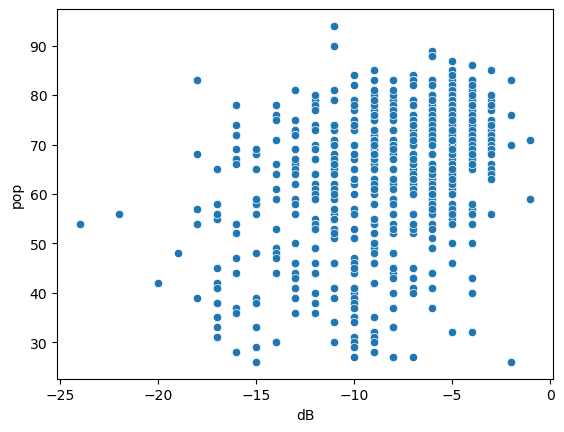

In [3]:
sns.scatterplot(x='dB', y='pop', data=df)

<AxesSubplot:xlabel='dnce', ylabel='pop'>

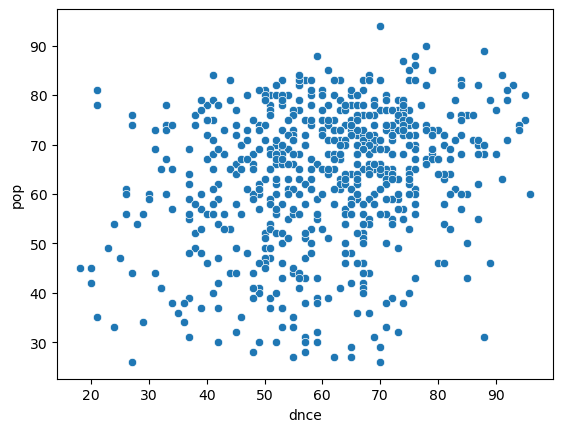

In [4]:
sns.scatterplot(x='dnce', y='pop', data=df)

<AxesSubplot:xlabel='nrgy', ylabel='pop'>

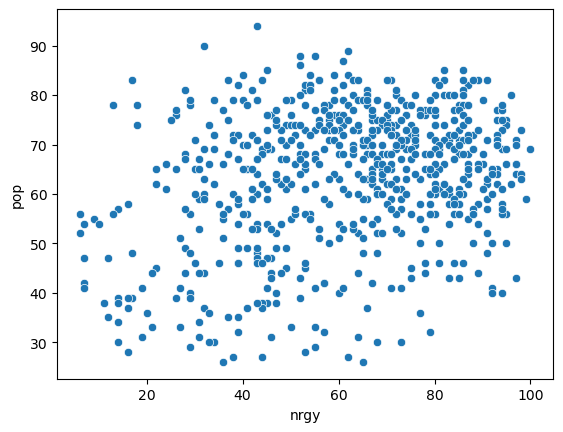

In [5]:
sns.scatterplot(x='nrgy', y='pop', data=df)

In [8]:
import statsmodels.formula.api as smf
model = smf.ols(formula='pop ~ dB + dnce + nrgy + acous + dur + live + val + spch', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     41.86
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           3.91e-54
Time:                        23:40:26   Log-Likelihood:                -2555.8
No. Observations:                 667   AIC:                             5130.
Df Residuals:                     658   BIC:                             5170.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.4650      4.368     16.134      0.000      61.889      79.041
dB             0.9465      0.178      5.317      0.000       0.597       1.296
dnce           0.1355      0.036      3.763      0.000       0.065       0.206
nrgy          -0.0906      0.037     -2.443      0.015      -0.163      -0.018
acous         -0.1679      0.022     -7.798      0.000      -0.210      -0.126
dur            0.0402      0.008      5.196      0.000       0.025       0.055
live          -0.0304      0.031     -0.977      0.329      -0.091       0.031
val           -0.1111      0.023     -4.830      0.000      -0.156      -0.066
spch           0.1811      0.073      2.472      0.014       0.037       0.325
==============================================================================
Omnibus:                       12.613   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.017
Skew:                          -0.342   Prob(JB):                      0.00149
Kurtosis:                       2.988   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,0.122851,0.030950,0.174730,0.046153,0.042841,0.046433,0.089254,0.058410,-0.074355,-0.059867,-0.519745
year,0.122851,1.000000,-0.020790,0.195329,0.273865,0.422602,-0.001603,-0.087055,-0.099655,-0.241289,0.193292,0.160467
bpm,0.030950,-0.020790,1.000000,0.179329,-0.057710,0.044748,0.009960,0.084723,0.038277,-0.175530,0.059116,0.066558
nrgy,0.174730,0.195329,0.179329,1.000000,0.331962,0.702543,0.132563,0.405190,0.131228,-0.665900,0.178491,0.271798
dnce,0.046153,0.273865,-0.057710,0.331962,1.000000,0.295534,-0.069818,0.454714,0.053011,-0.382297,0.207741,0.249302
dB,0.042841,0.422602,0.044748,0.702543,0.295534,1.000000,0.083423,0.136813,0.026851,-0.504551,0.200195,0.365172
live,0.046433,-0.001603,0.009960,0.132563,-0.069818,0.083423,1.000000,0.060542,-0.067533,-0.056394,0.091595,-0.036505
val,0.089254,-0.087055,0.084723,0.405190,0.454714,0.136813,0.060542,1.000000,-0.118664,-0.196375,0.053817,-0.102418
dur,0.058410,-0.099655,0.038277,0.131228,0.053011,0.026851,-0.067533,-0.118664,1.000000,-0.227505,0.045265,0.280501
acous,-0.074355,-0.241289,-0.175530,-0.665900,-0.382297,-0.504551,-0.056394,-0.196375,-0.227505,1.000000,-0.172820,-0.455239


In [26]:
# split data into train and test
from sklearn.model_selection import train_test_split
X = df.drop('pop', axis=1)
y = df['pop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [27]:
model = smf.ols(formula='pop ~ dB + dnce + nrgy + acous + dur + val + spch', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     40.43
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.75e-45
Time:                        12:38:44   Log-Likelihood:                -2021.4
No. Observations:                 533   AIC:                             4059.
Df Residuals:                     525   BIC:                             4093.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.2814      4.698     14.961      0.000      61.053      79.510
dB             1.0516      0.195      5.396      0.000       0.669       1.434
dnce           0.1711      0.038      4.448      0.000       0.096       0.247
nrgy          -0.1212      0.041     -2.947      0.003      -0.202      -0.040
acous         -0.1704      0.024     -7.125      0.000      -0.217      -0.123
dur            0.0390      0.008      4.682      0.000       0.023       0.055
val           -0.0937      0.025     -3.701      0.000      -0.143      -0.044
spch           0.1130      0.080      1.415      0.158      -0.044       0.270
==============================================================================
Omnibus:                       12.115   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.475
Skew:                          -0.374   Prob(JB):                      0.00196
Kurtosis:                       3.036   Cond. No.                     2.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
train.shape, test.shape

((533, 15), (134, 15))

In [30]:
# calculate rmse for train and test
from sklearn.metrics import mean_squared_error
from math import sqrt

train_rmse = sqrt(mean_squared_error(train['pop'], model.predict(train)))
test_rmse = sqrt(mean_squared_error(test['pop'], model.predict(test)))

print('train rmse: ', train_rmse)
print('test rmse: ', test_rmse)

train rmse:  10.735661354264455
test rmse:  12.893948928202503
